#### seaborn & folium

In [180]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy version  -  1.20.3
pandas version -  1.3.4


In [181]:
iris_dataset = sns.load_dataset('iris')
titanic_dataset = sns.load_dataset('titanic')
tips_dataset = sns.load_dataset('tips')
flights_dataset = sns.load_dataset('flights')


- barplot() : 범주형데이터값에 따른 시각화(평균, 편차, 에러) 
    

In [182]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks 


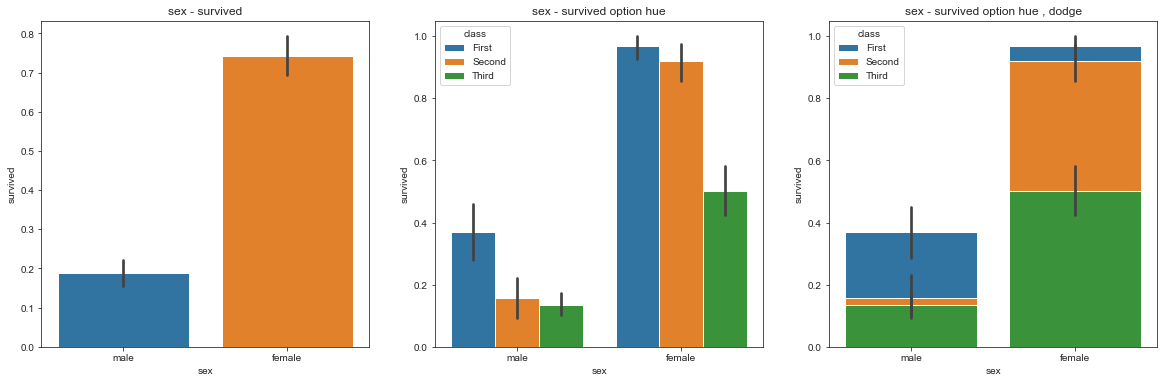

In [183]:
print('스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks ')

sns.set_style('ticks')


fig = plt.figure( figsize = (20, 6))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('sex - survived')
ax02.set_title('sex - survived option hue')
ax03.set_title('sex - survived option hue , dodge')

sns.barplot(ax = ax01 , data = titanic_dataset , x = 'sex' , y='survived')
sns.barplot(ax = ax02 , data = titanic_dataset , x = 'sex' , y='survived' , hue = 'class')
sns.barplot(ax = ax03 , data = titanic_dataset , x = 'sex' , y='survived' , hue = 'class' , dodge = False)

plt.show()
plt.close()

In [184]:
tips_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


요일별 전체 팁과 요일별 매출을 시각화 한다면? - 


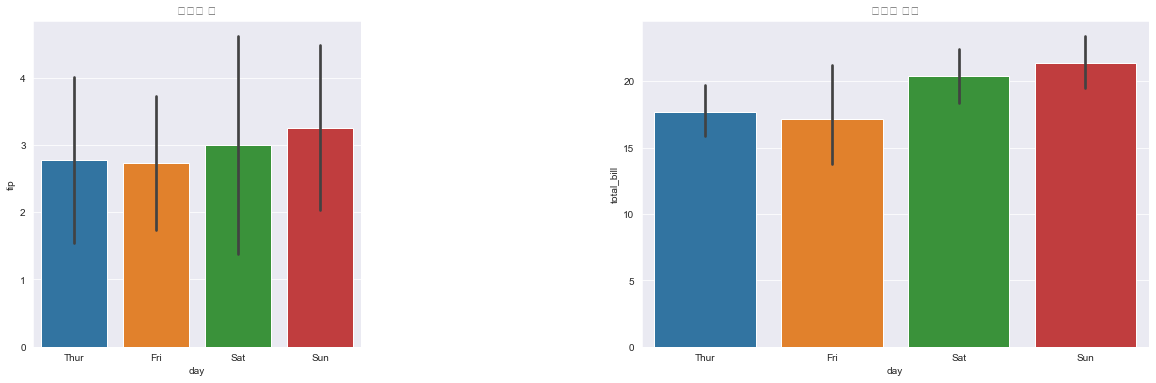

In [185]:
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


print('요일별 전체 팁과 요일별 매출을 시각화 한다면? - ') 

sns.set_style('darkgrid')


fig = plt.figure( figsize = (20, 6))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,2,2)


ax01.set_title('요일별 팁')
ax02.set_title('요일별 매출')

# ci = False  , ci = sd 
sns.barplot(ax = ax01 , data = tips_dataset , x = 'day' , y='tip' , ci = 'sd')
sns.barplot(ax = ax02 , data = tips_dataset , x = 'day' , y='total_bill')

plt.show()
plt.close()

- countplot() : 빈도를 표시하는 함수

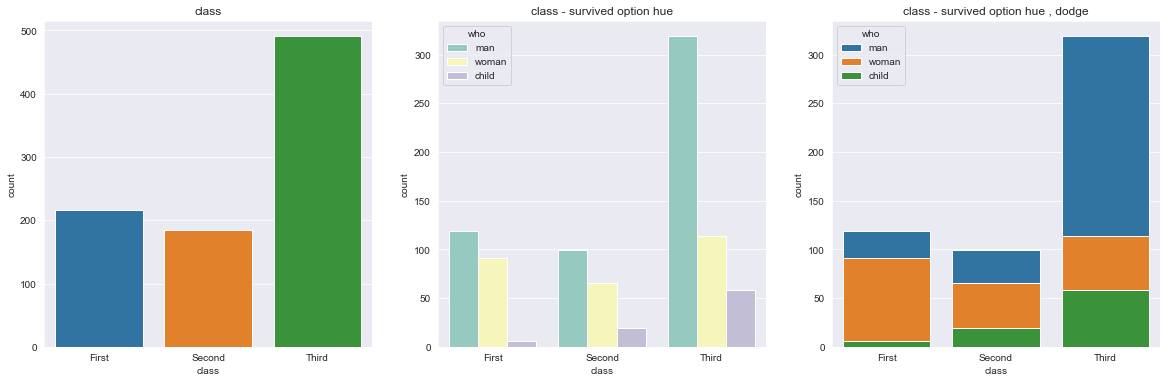

In [186]:
sns.set_style('darkgrid')


fig = plt.figure( figsize = (20, 6))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('class')
ax02.set_title('class - survived option hue')
ax03.set_title('class - survived option hue , dodge')

sns.countplot(ax = ax01 , data = titanic_dataset , x = 'class' )
sns.countplot(ax = ax02 , data = titanic_dataset , x = 'class' , hue = 'who' , palette = 'Set3')
sns.countplot(ax = ax03 , data = titanic_dataset , x = 'class' , hue = 'who' , dodge = False)

plt.show()
plt.close()

요일별로 팁을 준 빈도를 시각화 한다며? - 


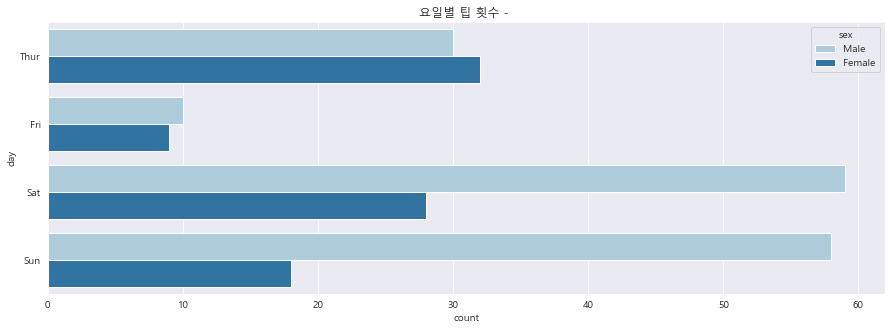

In [187]:
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)



print('요일별로 팁을 준 빈도를 시각화 한다며? - ') 

plt.figure( figsize = (15,5))

# sns.countplot(data = tips_dataset , x = 'day' , hue = 'sex' , palette = 'Set3')
sns.countplot(data = tips_dataset , y = 'day' , hue = 'sex' , palette = 'Paired')

plt.title('요일별 팁 횟수 - ')

plt.show()
plt.close()


- stripplot() : 모든 데이터를 점으로 시각화
- jitter = True : 겹처보이는 설정을 무작위 변경

요일별로 매출을 시각화 한다며? - 


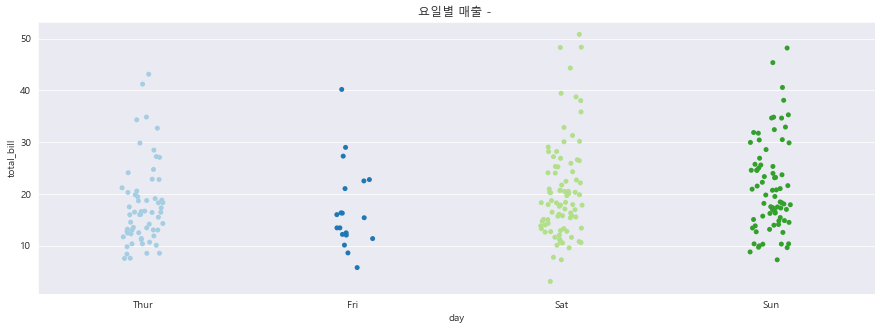

In [188]:
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)



print('요일별로 매출을 시각화 한다며? - ') 

plt.figure( figsize = (15,5))

sns.stripplot(data = tips_dataset , x = 'day' , y = 'total_bill' , palette = 'Paired' , jitter = True)

plt.title('요일별 매출 - ')

plt.show()
plt.close()


- swarmplot() : 데이터가 겹쳐보이지 않도록 옆으로 이동하여 시각화

요일별로 매출을 시각화 한다며? - 


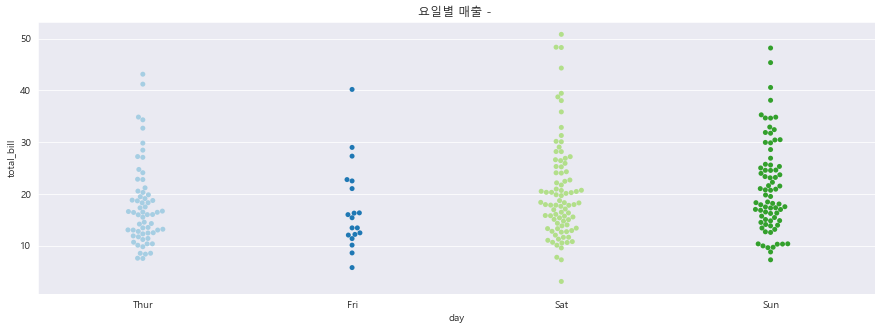

In [189]:
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)



print('요일별로 매출을 시각화 한다며? - ') 

plt.figure( figsize = (15,5))

sns.swarmplot(data = tips_dataset , x = 'day' , y = 'total_bill' , palette = 'Paired' )

plt.title('요일별 매출 - ')

plt.show()
plt.close()

타이타닉을 이용해서 
서브플롯으로 2개의 영역을 만들고 
class 별 나이분포를 확인하는 시각화 - stripplot , swarmplot 




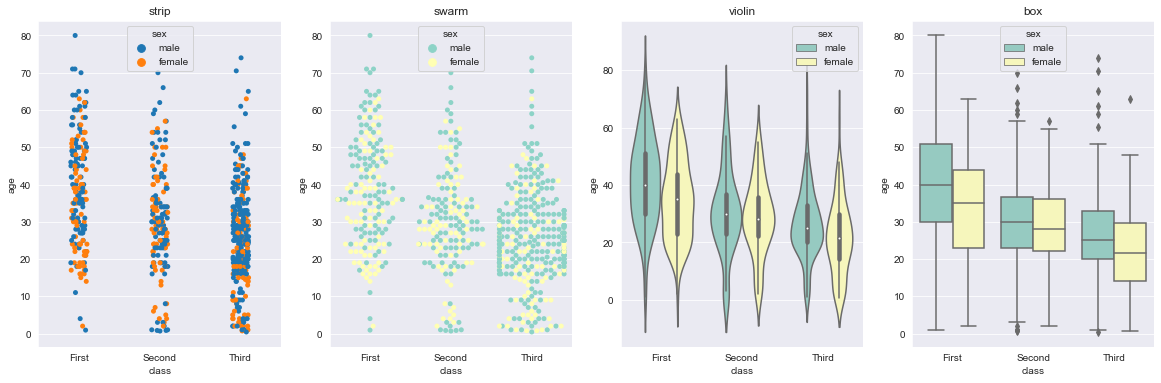

In [190]:
print('타이타닉을 이용해서 ')
print('서브플롯으로 2개의 영역을 만들고 ')
print('class 별 나이분포를 확인하는 시각화 - stripplot , swarmplot ')
print()
print()

sns.set_style('darkgrid')


fig = plt.figure( figsize = (20, 6))

ax01 = fig.add_subplot(1,4,1)
ax02 = fig.add_subplot(1,4,2)
ax03 = fig.add_subplot(1,4,3)
ax04 = fig.add_subplot(1,4,4)

ax01.set_title('strip')
ax02.set_title('swarm')
ax03.set_title('violin')
ax04.set_title('box')


sns.stripplot(ax = ax01 , data = titanic_dataset , x = 'class' , y = 'age' , jitter = True , hue = 'sex')
sns.swarmplot(ax = ax02 , data = titanic_dataset , x = 'class' , y = 'age' , palette = 'Set3' , hue = 'sex')
sns.violinplot(ax = ax03 , data = titanic_dataset , x = 'class' , y = 'age' , palette = 'Set3' , hue = 'sex')
sns.boxplot(ax = ax04 , data = titanic_dataset , x = 'class' , y = 'age' , palette = 'Set3' , hue = 'sex')

plt.show()
plt.close()


- heatmap

In [191]:
print('피봇테이블로 범주형 변수를 각각 행, 열로 재구분')
print('성별에 따른 선실등급 인원 수 구한다? - ') 
print('case01 - ')

table = titanic_dataset.groupby('sex')['class'].value_counts().unstack()
display( table )

table = titanic_dataset.pivot_table(index = 'sex'  , columns = 'class' , aggfunc = 'size' )
display( table )


피봇테이블로 범주형 변수를 각각 행, 열로 재구분
성별에 따른 선실등급 인원 수 구한다? - 
case01 - 


,Third,First,Second
sex,,,
female,144,94,76
male,347,122,108


class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


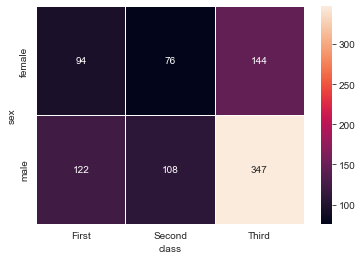

In [192]:
sns.heatmap(table , 
            annot = True ,
            fmt = 'd' , 
            linewidth = 1 , 
            cbar = True)

plt.show()
plt.close()

In [193]:
flights_dataset.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


년도에 월별 승객수를 히트맵으로 시각화 한다며? - 


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


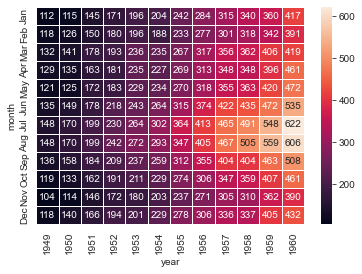

In [194]:
print('년도에 월별 승객수를 히트맵으로 시각화 한다며? - ')

table = flights_dataset.pivot(index = 'month', columns = 'year' , values = 'passengers')
display(table)


sns.heatmap(table , 
            annot = True ,
            fmt = 'd' , 
            linewidth = 1 , 
            cbar = True)

plt.show()
plt.close()


- 상관관계 시각화
- corr() -1 ~ 1

In [195]:
titanic_dataset.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


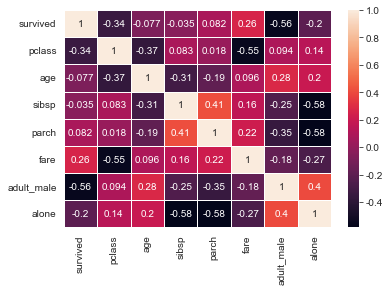

In [196]:
sns.heatmap(titanic_dataset.corr() , 
            annot = True ,
            linewidth = 1 , 
            cbar = True)

plt.show()
plt.close()

- pairplot() : 집합의 조합에 대한 히스토그램과 분포도를 시각화

In [197]:
tips_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


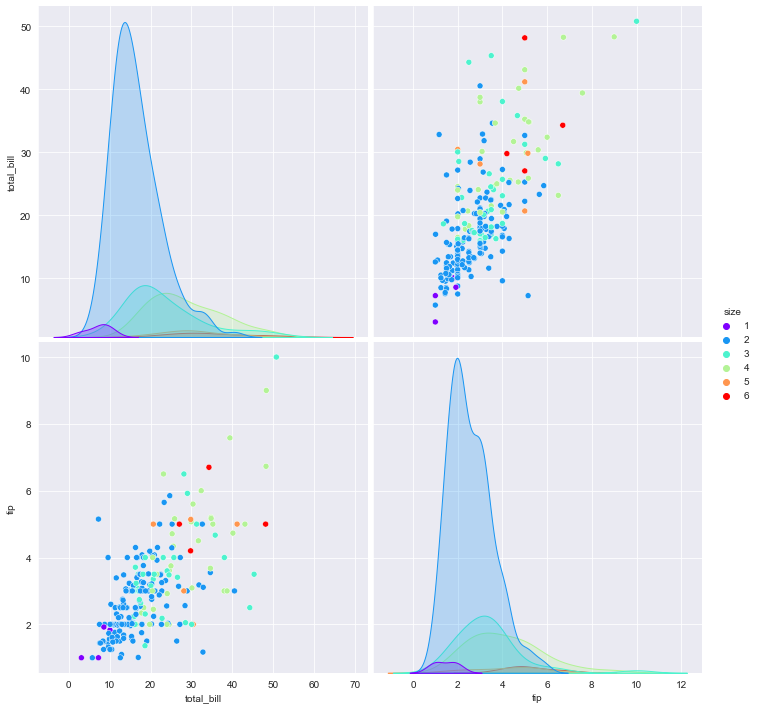

In [198]:
sns.pairplot(tips_dataset , hue = 'size' , palette = 'rainbow'  , height = 5,)

plt.show()
plt.close()

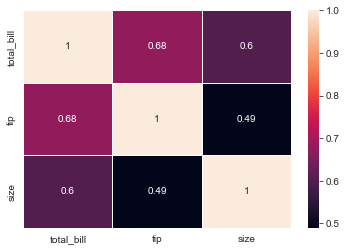

In [199]:
sns.heatmap(tips_dataset.corr() , 
            annot = True ,
            linewidth = 1 , 
            cbar = True)

plt.show()
plt.close()

- lmplot : 피처간의 선형관계를 확인하는 시각화
- outlier 확인 가능한 함수

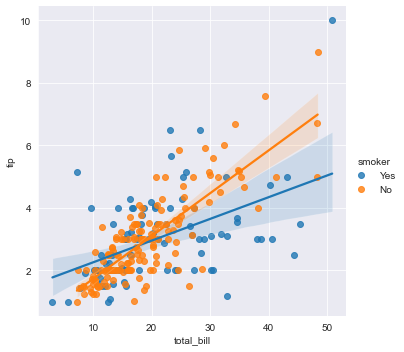

In [200]:
sns.lmplot(data = tips_dataset , x = 'total_bill' , y = 'tip'  , hue = 'smoker')

plt.show()
plt.close()

- relplot : 상관관계 확인 lmplot 처럼 선형관계를 따로 시각화하지 않음

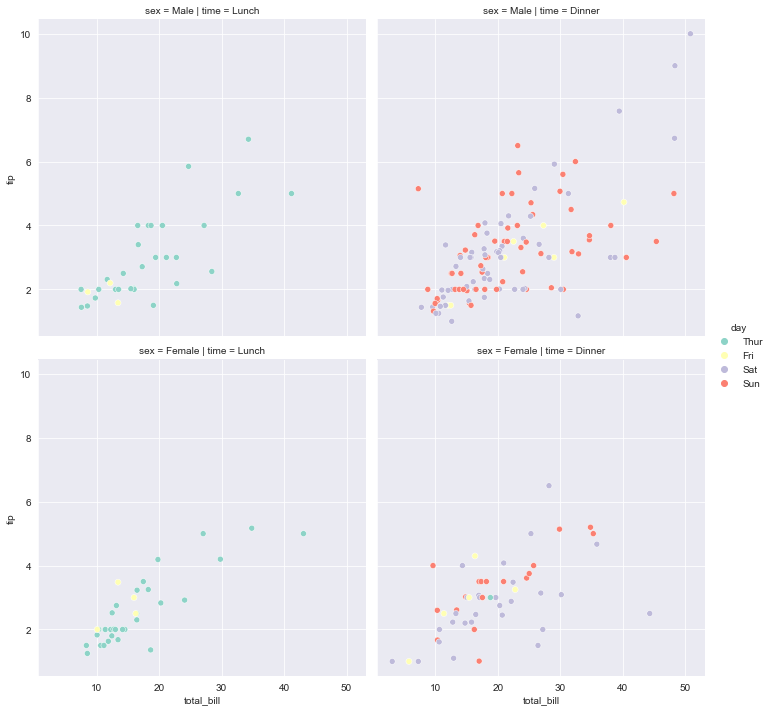

In [201]:
sns.relplot(data = tips_dataset , x = 'total_bill' , y = 'tip'  , hue = 'day' , col = 'time' , row = 'sex' , palette='Set3')

plt.show()
plt.close()

#### folium

In [202]:
import folium as g

In [203]:
map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12)
map.save('./visualization_data/map.html')

In [204]:
print()
# map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 )
# map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 , tiles = 'Stamen toner')
# map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 , tiles = 'Stamen watercolor')
# map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 , tiles = 'cartodbdark_matter')
# map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 , tiles = 'cartodb positron')
# map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 , tiles = 'openstreetmap')

map

- 지도에 마커기능 활용하기 (서울지역 대학교 위치.xlsx)

In [205]:
seoul_uni_frm = pd.read_excel('./visualization_data/서울지역 대학교 위치.xlsx')
seoul_uni_frm.set_index('Unnamed: 0' , inplace = True ) 
seoul_uni_frm

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610
건국대학교,37.540762,127.079343
경기대학교 서울캠퍼스,37.300485,127.035833
경희대학교 서울캠퍼스,37.596195,127.052544
고려대학교,33.847782,-117.977748


In [206]:
# g.Marker([lat, lng] , popup = name).add_to(map)

map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 )

for name, lat, lng in zip(seoul_uni_frm.index , seoul_uni_frm['위도'] , seoul_uni_frm['경도']) : 
    # g.Marker([lat, lng] , popup = name , icon = g.Icon(color = 'blue' , icon = 'star')).add_to(map)
    g.CircleMarker([lat, lng] , 
                    popup = name , 
                    icon = g.Icon(color = 'blue') , 
                    fill = True , 
                    fill_color = 'coral' , 
                    fill_opacity = .5 , 
                    radius = 5).add_to(map)
    
map

- elem_school_folium.xlsx

In [207]:
school_frm = pd.read_excel('./visualization_data/elem_school_folium.xlsx')
school_frm.head()

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000001838,서울휘경초등학교,초등학교,1959-10-10,공립,본교,운영,서울특별시 동대문구 휘경동 302-2,서울특별시 동대문구 망우로6길 48,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.585736,127.058122,2019-09-16,7001220,한국교원대학교
1,B000001839,서울동답초등학교,초등학교,1984-05-23,공립,본교,운영,서울특별시 동대문구 답십리동 2-24,서울특별시 동대문구 답십리로60길 12,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.571817,127.064205,2019-09-16,7001220,한국교원대학교
2,B000001840,서울답십리초등학교,초등학교,1962-11-29,공립,본교,운영,서울특별시 동대문구 답십리동 274,서울특별시 동대문구 전농로3길 23,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.569003,127.055423,2019-09-16,7001220,한국교원대학교
3,B000001841,서울신답초등학교,초등학교,1972-05-09,공립,본교,운영,서울특별시 동대문구 답십리동 463-13,서울특별시 동대문구 천호대로 177,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.573001,127.043399,2019-09-16,7001220,한국교원대학교
4,B000001842,서울용두초등학교,초등학교,1948-11-01,공립,본교,운영,서울특별시 동대문구 용두동 237-1,서울특별시 동대문구 천호대로13길 43,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.575743,127.028885,2019-09-16,7001220,한국교원대학교


In [208]:
print('요구사항01 - ')
print('Feature Selection - 학교명, 학교급구분, 소재지도로명주소, 위도, 경도')
# school_frm_subset = school_frm[['학교명', '학교급구분', '소재지도로명주소', '위도', '경도']]
school_frm_subset = school_frm.filter(['학교명', '학교급구분', '소재지도로명주소', '위도', '경도'])
school_frm_subset


요구사항01 - 
Feature Selection - 학교명, 학교급구분, 소재지도로명주소, 위도, 경도


,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11868,평택새빛초등학교,초등학교,경기도 평택시 신촌2로 33(칠원동),37.024922,127.105114
11869,마장초등학교,초등학교,경기도 이천시 마장면 오천로 130,37.246497,127.358475
11870,인천중산초등학교,초등학교,인천광역시 중구 두미포로 100,37.494695,126.565599
11871,인천중산중학교,중학교,인천광역시 중구 두미포로 189,37.498222,126.571277


In [209]:
print('요구사항02 - ')
print('조건 - 소재지도로명주소에 서울이 포함되고 학교급구분이 초등학교만 필터 - ')
print('DataFrame - query( 비교, in 연산자, 논리 , 문자열 부분검색)  - ') 

# school_subset = school_frm_subset[ (school_frm_subset['소재지도로명주소'].str.contains('서울') == True) & ( school_frm_subset['학교급구분'] == '초등학교')]
# school_subset

condition = "학교급구분 == '초등학교' and 소재지도로명주소.str.contains('서울특별시').values == True"
school_subset = school_frm_subset.query( condition ) 
school_subset

요구사항02 - 
조건 - 소재지도로명주소에 서울이 포함되고 학교급구분이 초등학교만 필터 - 
DataFrame - query( 비교, in 연산자, 논리 , 문자열 부분검색)  - 


,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11684,서울위례별초등학교,초등학교,서울특별시 송파구 위례광장로 243,37.479086,127.145042
11702,서울하늘숲초등학교,초등학교,서울특별시 구로구 오리로 1106,37.484688,126.842417
11731,서울언남초등학교,초등학교,서울특별시 서초구 헌릉로8길 42,37.453919,127.061343
11772,서울항동초등학교,초등학교,서울특별시 구로구 연동로 178,37.476731,126.823983


In [210]:
print('결측값 확인')
print( school_subset.isnull().sum() )

print()
print('결측값 drop')
school_subset.dropna(inplace = True)
print( school_subset.isnull().sum() )

display( school_subset )

결측값 확인
학교명         0
학교급구분       0
소재지도로명주소    0
위도          0
경도          0
dtype: int64

결측값 drop
학교명         0
학교급구분       0
소재지도로명주소    0
위도          0
경도          0
dtype: int64


,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11684,서울위례별초등학교,초등학교,서울특별시 송파구 위례광장로 243,37.479086,127.145042
11702,서울하늘숲초등학교,초등학교,서울특별시 구로구 오리로 1106,37.484688,126.842417
11731,서울언남초등학교,초등학교,서울특별시 서초구 헌릉로8길 42,37.453919,127.061343
11772,서울항동초등학교,초등학교,서울특별시 구로구 연동로 178,37.476731,126.823983


In [211]:
print('지도 시각화 - 위도, 경도, 학교명')

map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 )

# MarkerCluster

for idx in  school_subset.index : 
    g.Marker( [ school_subset.loc[idx , '위도'], school_subset.loc[idx , '경도']] , 
              popup = school_subset.loc[idx , '학교명'] ,
              icon = g.Icon(color = 'blue' , icon = 'star')).add_to(map)
    
map

지도 시각화 - 위도, 경도, 학교명


In [212]:
school_subset.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11648, 11649, 11674, 11675, 11683, 11684, 11702, 11731, 11772,
            11798],
           dtype='int64', length=603)

- 경기도행정구역경계.json , 경기도인구데이터.xlsx
- Choropleth : 등치지도

In [213]:
pop_frm = pd.read_excel('./visualization_data/경기도인구데이터.xlsx')
pop_frm.set_index('구분' , inplace = True ) 
pop_frm.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [214]:
geo_data = json.load( open('./visualization_data/경기도행정구역경계.json' , encoding = 'utf-8') )
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [215]:
pop_frm.columns = pop_frm.columns.map(str)
pop_frm.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [218]:
map = g.Map(location = [37.5666805 , 126.9784147] , zoom_start = 12 )


g.Choropleth(geo_data = geo_data , 
             data = pop_frm['2017'] , 
             columns = [pop_frm.index , pop_frm['2017']] , 
             key_on = 'feature.properties.name').add_to(map)

map

구분
수원시장안구     293828
수원시권선구     365653
수원시팔달구     193311
수원시영통구     349836
성남시수정구     236932
성남시중원구     230366
성남시분당구     500212
의정부시       441584
안양시만안구     254977
안양시동안구     332787
부천시원미구     442898
부천시소사구     222016
부천시오정구     184073
광명시        332790
평택시        481530
동두천시        97071
안산시상록구     370744
안산시단원구     306966
고양시덕양구     448684
고양시일산동구    293673
고양시일산서구    299626
과천시         57527
구리시        200042
남양주시       665321
오산시        213437
시흥시        419664
군포시        281205
의왕시        155767
하남시        232487
용인시처인구     231553
용인시기흥구     419429
용인시수지구     353099
파주시        437848
이천시        213142
안성시        182786
김포시        392092
화성시        691086
광주시        345947
양주시        212146
포천시        152925
여주시        111984
연천군         45431
가평군         62973
양평군        115105
Name: 2017, dtype: int64